# Dataset

## Animations Rating on Crunchyroll


All of the content in Dataset comes from Crunchyroll, a Japanese animation streaming platform that is widely acclaimed in Europe and the United State, collection of more than thirteen hundred animations and their rating information. I tried to use it to analyze the most popular Japanese animations of all time.
In addition, it is well known that during the development of Japanese animation, the drawing style has undergone some changes. Different artists have their own representative styles, so I also wanted to find out if the different eras of animation also had an effect on the popularity.

The first question is, what is the most popular animation on Crunchyroll of all time?

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
anime_df = pd.read_csv('C:/Users/70794/Crunchyroll.csv', delimiter=",", encoding='ISO-8859-1')

In [13]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269 entries, 0 to 1268
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1269 non-null   object 
 1   series_launch_year  1269 non-null   int64  
 2   season_count        1269 non-null   int64  
 3   total               1269 non-null   int64  
 4   average             1269 non-null   float64
 5   1s                  1269 non-null   float64
 6   2s                  1269 non-null   float64
 7   3s                  1269 non-null   float64
 8   4s                  1269 non-null   float64
 9   5s                  1269 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 99.3+ KB


In [16]:
top_10_average = anime_df.nlargest(10, "average")
print(top_10_average)

                                               title  series_launch_year  \
701                                NatsumeYujin-cho6                2017   
1017                            TheApothecaryDiaries                2023   
5                                       86EIGHTY-SIX                2021   
51                                     AttackonTitan                2013   
64                                         Barakamon                2014   
90                                          BLUELOCK                2022   
91                                    BOCCHITHEROCK!                2022   
104                                     BuddyDaddies                2023   
109                               BungoStrayDogsWAN!                2021   
119   CampfireCookinginAnotherWorldwithMyAbsurdSkill                2023   

      season_count   total  average     1s     2s     3s     4s     5s  
701              1    1232      5.0   68.0   68.0  188.0  325.0  957.0  
1017             

Surprisingly, Natsume Yujin-cho received a high score of 5.0 at the top of the list. The animated film was very well received in East Asia, and although it received a high score on Crunchyroll, only 1,232 people rated it.

In contrast, Attack on Titan still boasts a 4.9 out of 5 rating when it has over 210,000 ratings. And then there's Blue Lock, the new 2022 animation, which has already been rated by 110,000 people, again with a 4.9 rating. This is a soccer animation.

Next I will filter the number of raters. Only look at animations more than 100,000 ratings.

In [26]:
total_data = anime_df[anime_df["total"] > 100000][['total', 'title', 'average','series_launch_year']]
sorted_total = total_data.sort_values(by='total', ascending=False)

print(sorted_total)


       total                               title  average  series_launch_year
737   361813                            OnePiece      4.9                2021
199   342637          DemonSlayer:KimetsunoYaiba      4.9                2019
134   282773                         ChainsawMan      4.9                2022
457   271960                       JUJUTSUKAISEN      4.9                2017
954   245739                          SPYxFAMILY      4.9                2018
51    213389                       AttackonTitan      4.9                2013
672   153569                      MyHeroAcademia      4.7                2023
663   131340  MushokuTensei:JoblessReincarnation      4.8                2014
696   129345                     NarutoShippuden      4.7                2016
90    110902                            BLUELOCK      4.9                2022
1011  105216    ThatTimeIGotReincarnatedasaSlime      4.9                2017
80    105102                         BlackClover      4.8       

A total of 13 animations have received more than 100,000 ratings. And they all have 4.7+ ratings. Not surprisingly the One Piece came in at number one. In comparison Attack on Titan is even behind Spy Family, which exploded onto the scene a few years ago.
It's also worth noting that with the exception of Spy Family, BlueLock, and My Dress-Up Darling, the other three are classified as battle dramas. A comparison with Asian animation platforms might allow us to further analyze the preferences of animation viewers in different regions.

Finally, I would like to explore the relationship between the era of animation and popularity through drawing.

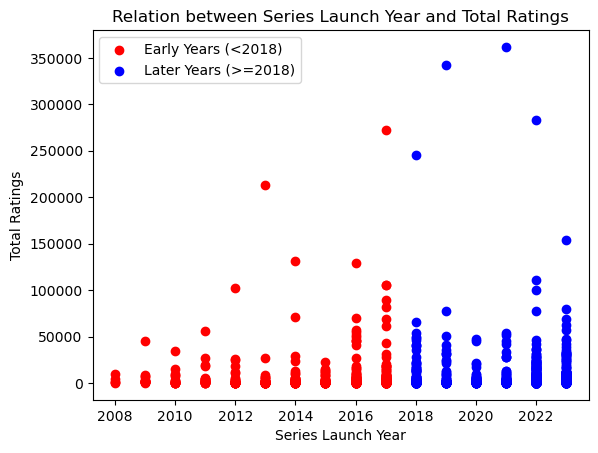

In [40]:
draw_data = anime_df[['title', 'series_launch_year', 'total']]

early_years = draw_data[draw_data['series_launch_year'] < 2018]
later_years = draw_data[draw_data['series_launch_year'] >= 2018]

fig, ax = plt.subplots()

ax.scatter(early_years['series_launch_year'], early_years['total'], color='red', label='Early Years (<2018)')
ax.scatter(later_years['series_launch_year'], later_years['total'], color='blue', label='Later Years (>=2018)')

plt.xlabel('Series Launch Year')
plt.ylabel('Total Ratings')
plt.title('Relation between Series Launch Year and Total Ratings')
plt.legend()

plt.show()

Using 5 years ago as a boundary, it is clear that more people have watched new animations since 2018 compared to before 2018.
So far in 2018, two animations have over 300,000 ratings and two have over 200,000 ratings. While before 2018 only two animations had more than 200,000 ratings. On the other hand, in the range of 100,000 to 200,000 ratings, pre-2018 animations performed better.
Therefore, although the new animation is more in line with the current aesthetics in terms of story and style, the old classic animation is also popular and has been around for a long time.